##Objetivo principal del proyecto: Predecir si un cliente no pagará su tarjeta de crédito. 
### Descripción del problema
Este proyecto tiene como objetivo predecir el caso de los incumplimientos de pagos de los clientes en Taiwán en 2005. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad de incumplimiento estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles. Haciendo uso de librerias como Pandas, Matplotlib, Smote, Pycaret, entre otras.

### Descripción de datos
#### Información de atributos:
Esta investigación empleó una variable binaria, incumplimiento de pago (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó 23 de las siguientes 25 variables como variables explicativas:
*   ID: ID of each client
*     LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
*     SEX: Gender (1=male, 2=female)
*     EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*     MARRIAGE: Marital status (1=married, 2=single, 3=others)
*     AGE: Age in years
*     PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   PAY_2: Repayment status in August, 2005 (scale same as above)
*   PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
*  PAY_5: Repayment status in May, 2005 (scale same as above)
*  PAY_6: Repayment status in April, 2005 (scale same as above)
*  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


### Objetivo:

El objetivo de nuestro proyecto es predecir qué cliente podría incumplir en los próximos meses. Antes de continuar, echemos un vistazo rápido a la definición de lo que realmente significa el incumplimiento de la tarjeta de crédito.

* Todos somos conscientes de lo que es la tarjeta de crédito. Es un tipo de pago con tarjeta de pago en el que se realizan cargos contra una línea de crédito en lugar de los depósitos en efectivo del titular de la cuenta. Cuando alguien usa una tarjeta de crédito para hacer una compra, la cuenta de esa persona acumula un saldo que debe pagarse cada mes.

* El incumplimiento de pago de la tarjeta de crédito ocurre cuando se ha atrasado gravemente en los pagos de su tarjeta de crédito. La falta de pago de la tarjeta de crédito una o dos veces no cuenta como un incumplimiento. Se produce un incumplimiento de pago cuando no paga la cantidad mínima adeudada en la tarjeta de crédito durante algunos meses consecutivos.

## Principalmente abordaremos tres métodos:
1. Usar Pycaret para preparar el dataset directamente, elegir el modelo que tenga mayor precisión (accuracy), entrenar el modelo, ajustar los parametros, evaluar el modelo, predecir, e interpretar los resultados.
1. Usaremos SMOTE para un preprocesamiento de los datos ya que, el dataset refleja una distribución desigual de clases, posteriormente usaremos Pycaret para preparar los datos, elegir el modelo que tenga mayor precisión (accuracy), entrenar el modelo, ajustar los parametros, evaluar el modelo, predecir, e interpretar los resultados.
1. Haremos una limpieza de los datos más detallada, asi como un EDA, resolveremos el problema del desequilibrio en los datos con SMOTE y realizaremos todo el proceso de ML con Pycaret.


# Importar librerias y el dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"letrastrasletras","key":"00c1bdc9538dc48b6ab2d1f7e1f7e44d"}'}

In [ ]:
# Crear una carpeta para kaggle 
! mkdir ~/.kaggle

In [ ]:
# Copiar el archivo kaggle.json a la carpeta creada
! cp kaggle.json ~/.kaggle/

In [ ]:
# Dar permisos para que el archivo json corra
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d <---API--->
#1. Para este paso podemos ir a la página principal del dataset que queremos descargar.
#2. Hacemos click en el botón a la derecha de New Notebook, 
# lo cual desplegará un menú y en él seleccionaremos la opción Copy API Command.
! kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 117MB/s]


In [ ]:
#En caso de descargar archivos ZIP, utilizar !unzip <file.zip>
!unzip default-of-credit-card-clients-dataset.zip

Archive:  default-of-credit-card-clients-dataset.zip
  inflating: UCI_Credit_Card.csv     


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from imblearn.over_sampling import SMOTE
from pycaret.classification import *

In [ ]:
!pip install --pre pycaret
!pip install autoviz
!pip install pycaret[mlops]
!pip install pycaret[analysis]
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 7.6 MB/s 
     |████████████████████████████████| 141 kB 56.0 MB/s 
     |████████████████████████████████| 1.4 MB 38.7 MB/s 
     |████████████████████████████████| 44 kB 2.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 7.0 MB 42.9 MB/s 
     |████████████████████████████████| 2.0 MB 43.3 MB/s 
     |████████████████████████████████| 3.3 MB 42.8 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 280 kB 51.4 MB/s 
     |████████████████████████████████| 79.9 MB 114 kB/s 
     |████████████████████████████████| 106 kB 73.4 MB/s 
     |████████████████████████████████| 72 kB 892 kB/s 
     |████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 240 kB 13.8 MB/s 
     |████████████████████████████████| 1.7 MB 45.4 MB/s 
     |████████████████████████████████| 18.5 MB 120 kB/s 
     |████████████████████████████████| 3.2 MB 50.4 MB/s 
     |████████████████████████████████| 12.9 MB 33.0 MB/s 
     |████████████████████████████████| 121 kB 66.4 MB/s 
     |████████████████████████████████| 83 kB 2.1 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=5676811f55e9f6a169f6482367492a49433355cf331898c74dcc1019014e2235
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
  Attemptin

In [ ]:
data = pd.read_csv('/content/UCI_Credit_Card.csv')

In [ ]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Lo que sabemos sobre el conjunto de datos:
* Tenemos registros de 30,000 clientes. 
* Ninguna variable tiene valores nulos
* La variable ID no nos será de utilidad, dejandonos 23 variables. (Recordando que nuestra variable respuesta es 'default.payment.next.month')

Primero confirmaremos que no contamos con algún valor nulo

In [ ]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Ahora obtengamos estadisticas rápidas con el metodo .describe()

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Algo que conviene antes de comenzar con alguno de los métodos propuesto es renombrar nuestra variable respuesta solo por practicidad. Le asignaremos
* 'Defaulter' (Moroso: Persona que se retrasa en el pago de una deuda o en la devolución de una cosa)

In [ ]:
data['Defaulter'] =data['default.payment.next.month']
data = data.drop('default.payment.next.month',axis = 1)


In [ ]:
data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


# Método 1. Pycaret

Definimos nuestro entorno de Pycaret, donde indicamos de dónde obtenemos nuestros datos, cuál es la variable respuesta, y cuál variable omitiremos. Esto, puede mejorarse pero para fines explicativamos solo se definen esos tres parámetros)

In [ ]:
crt1 = setup(data=data, 
             target = 'Defaulter', 
             ignore_features=['ID']
             )

,Description,Value
0,Session id,4235
1,Target,Defaulter
2,Target type,Binary
3,Original data shape,"(30000, 24)"
4,Transformed data shape,"(30000, 24)"
5,Transformed train set shape,"(20999, 24)"
6,Transformed test set shape,"(9001, 24)"
7,Ignore features,1
8,Numeric features,23
9,Preprocess,True


Ahora, probaremos 14 diferentes modelos y utilizaremos el que se ajuste a lo que buscamos, en nuestro caso, el que tenga mayor nivel de  precisión (accuracy)

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8195,0.7750,0.3598,0.6733,0.4684,0.3716,0.3984,7.0880
lightgbm,Light Gradient Boosting Machine,0.8178,0.7737,0.3578,0.6645,0.4648,0.3667,0.3925,0.5630
ada,Ada Boost Classifier,0.8148,0.7660,0.3122,0.6780,0.4267,0.3340,0.3701,1.5650
rf,Random Forest Classifier,0.8147,0.7603,0.3632,0.6455,0.4643,0.3627,0.3849,5.4540
lda,Linear Discriminant Analysis,0.8095,0.7126,0.2469,0.6981,0.3643,0.2811,0.3342,0.1350
et,Extra Trees Classifier,0.8066,0.7477,0.3576,0.6074,0.4497,0.3419,0.3598,2.2780
ridge,Ridge Classifier,0.7985,0.0000,0.1389,0.7391,0.2335,0.1757,0.2593,0.0770
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0650
lr,Logistic Regression,0.7787,0.6393,0.0000,0.0000,0.0000,-0.0003,-0.0035,1.5080
knn,K Neighbors Classifier,0.7498,0.5987,0.1750,0.3625,0.2360,0.1079,0.1180,2.8530


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4235, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

En este caso, el modelo es ***Gradient Boosting Classifier*** con:
* *Accuracy*: 0.8195
* *AUC*: 0.7750 (*Area Under the ROC Curve*)
* *F1*: 0.4684 (0 <= *F1* <= 1)
* *Kappa*: 0.3716 (-1 <= *Kappa* <= 1)
* *MCC*: 0.3984 (*Matthews Correlation Coefficient*)

* ***Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model***

Lo siguiente es crear el modelo 'gbc'


In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8143,0.7680,0.3707,0.6370,0.4687,0.3655,0.3852
1,0.8267,0.7905,0.3772,0.7000,0.4902,0.3969,0.4245
2,0.8300,0.7826,0.3513,0.7443,0.4773,0.3910,0.4304
3,0.8143,0.7659,0.3599,0.6423,0.4613,0.3597,0.3818
4,0.8295,0.7832,0.3720,0.7238,0.4915,0.4015,0.4336
5,0.8090,0.7759,0.3183,0.6379,0.4247,0.3252,0.3535
6,0.8195,0.7774,0.3677,0.6680,0.4743,0.3763,0.4007
7,0.8100,0.7550,0.3226,0.6410,0.4292,0.3298,0.3579
8,0.8233,0.7812,0.3656,0.6911,0.4782,0.3838,0.4120


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Ajustamos el modelo, reajustando los hiperparámetros:
* GradientBoostingClassifier(
  * ccp_alpha=0.0, 
  * criterion='friedman_mse', 
  * init=None,
  * learning_rate=0.1,
  * loss='deviance',
  * max_depth=3,
  * max_features=None,
  * max_leaf_nodes=None,
  * min_impurity_decrease=0.0, 
  * min_samples_leaf=1,
  * min_samples_split=2, 
  * min_weight_fraction_leaf=0.0,
  * n_estimators=100,
  * n_iter_no_change=None,
  * random_state=4235, 
  * subsample=1.0, 
  * tol=0.0001,
  * validation_fraction=0.1,
  * verbose=0,
  * warm_start=False
  )

In [ ]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8119,0.7645,0.3448,0.6375,0.4476,0.3461,0.3699
1,0.8267,0.7828,0.3707,0.7049,0.4859,0.3935,0.4230
2,0.8224,0.7763,0.3276,0.7136,0.4490,0.3601,0.3990
3,0.8105,0.7705,0.3470,0.6289,0.4472,0.3442,0.3664
4,0.8205,0.7774,0.3484,0.6864,0.4622,0.3680,0.3985
5,0.8076,0.7730,0.3011,0.6393,0.4094,0.3118,0.3434
6,0.8176,0.7717,0.3548,0.6653,0.4628,0.3650,0.3912
7,0.8114,0.7525,0.3161,0.6533,0.4261,0.3292,0.3603
8,0.8224,0.7820,0.3527,0.6949,0.4679,0.3747,0.4058


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


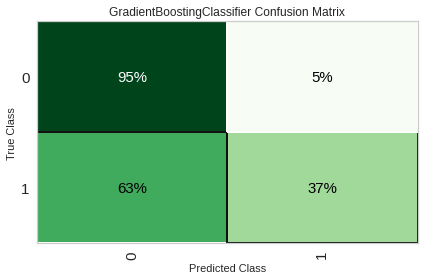

In [ ]:
plot_model(tuned_gbc, plot='confusion_matrix', plot_kwargs={'percent':True})

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 432x288 with 0 Axes>

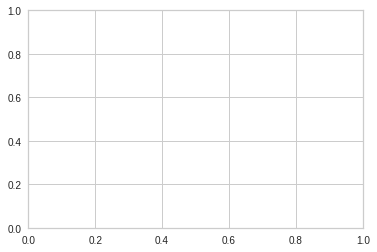

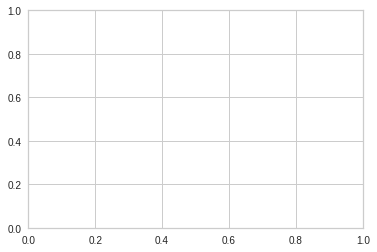

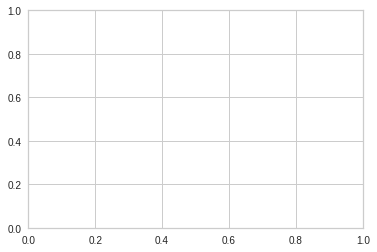

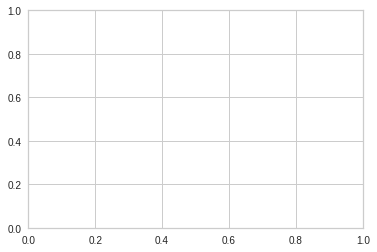

In [ ]:
evaluate_model(tuned_gbc)

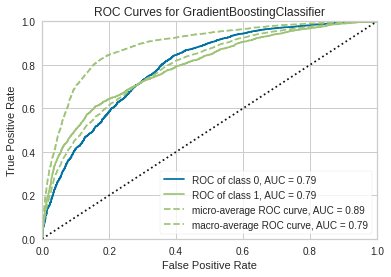

In [ ]:
plot_model(tuned_gbc, plot='auc')

#Método 2. Smote & Pycaret

In [ ]:
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
340,341,240000.0,2,2,2,30,-2,-2,-2,-2,...,0.0,92.0,0.0,92.0,92.0,0.0,92.0,0.0,1883.0,0
1299,1300,70000.0,1,2,1,37,-1,2,0,0,...,3559.0,7086.0,6979.0,0.0,3559.0,189.0,7086.0,3370.0,0.0,1
29240,29241,110000.0,1,2,2,24,-2,-2,-2,-2,...,-150.0,150.0,952.0,326.0,176.0,0.0,952.0,952.0,0.0,1
28660,28661,60000.0,2,3,2,44,0,0,0,0,...,31437.0,32113.0,33591.0,2300.0,2600.0,1600.0,1200.0,2000.0,1300.0,0
3156,3157,70000.0,2,2,1,28,1,3,2,2,...,31850.0,31207.0,32037.0,1800.0,600.0,2000.0,0.0,1500.0,1500.0,1
19967,19968,200000.0,2,1,2,35,-1,-1,-1,-1,...,9471.0,985.0,4489.0,2700.0,1000.0,9500.0,1000.0,4500.0,1301.0,0
28057,28058,50000.0,2,3,1,34,2,2,2,2,...,32250.0,34245.0,19719.0,5000.0,3000.0,0.0,5000.0,0.0,3000.0,1
7231,7232,180000.0,1,2,1,45,0,0,0,0,...,122244.0,119536.0,109210.0,6000.0,6000.0,5000.0,4200.0,3862.0,3887.0,0
10065,10066,100000.0,1,1,2,27,0,0,0,0,...,2805.0,354.0,443.0,1120.0,1000.0,0.0,354.0,443.0,441.0,1
2936,2937,100000.0,1,2,2,29,0,0,0,-2,...,0.0,0.0,0.0,2106.0,0.0,0.0,0.0,0.0,0.0,0


<AxesSubplot:xlabel='Defaulter', ylabel='count'>

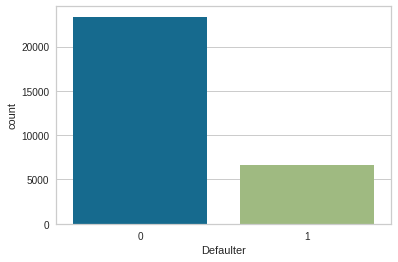

In [ ]:
import seaborn as sns

<Figure size 720x360 with 0 Axes>

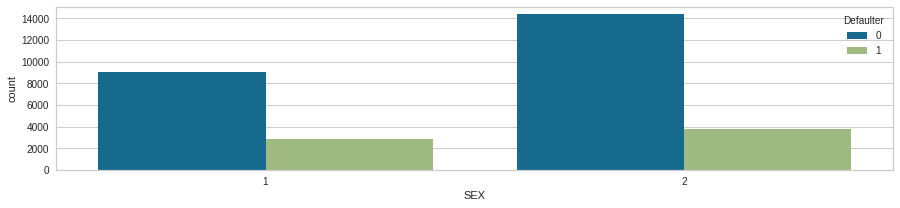

<Figure size 720x360 with 0 Axes>

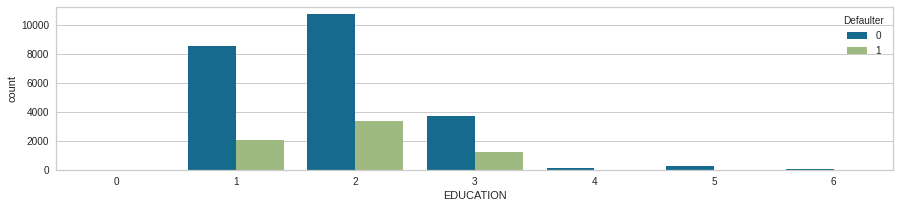

<Figure size 720x360 with 0 Axes>

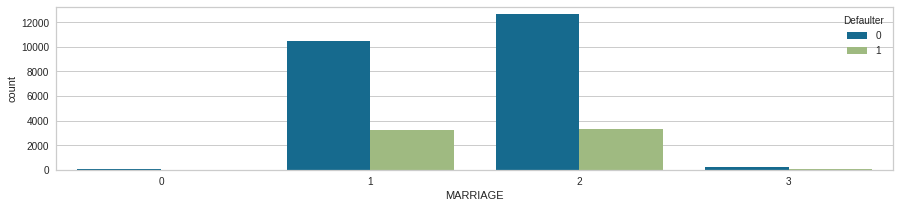

<Figure size 720x360 with 0 Axes>

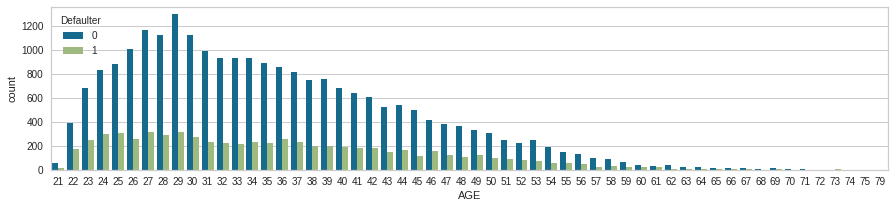

In [ ]:
categorical_features = ['SEX','EDUCATION','MARRIAGE','AGE']
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=1, figsize=(15,3))
  sns.countplot(data=data,x=col,hue='Defaulter')

In [ ]:
# from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Defaulter'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,22277,138441.335116,1,2,2,25,1,0,0,0,...,132639.150090,121422.331502,117834.833655,120477.934567,4229.108893,6084.438601,5431.923397,3651.875248,8077.054719,776.215112
46724,2409,130000.000000,1,1,1,31,-1,0,0,-1,...,187.621897,207.108855,188.036115,387.707777,603.496478,188.036115,207.523073,188.036115,387.707777,415.046145
46725,10472,200000.000000,2,1,1,39,1,-1,1,1,...,1226.830012,23.050887,28.813608,663.005757,1640.982961,0.000000,23.435068,57.627217,663.005757,89.130095
46726,23068,360000.000000,2,2,1,44,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Defaulter, Length: 46728, dtype: int64

In [ ]:
columns = list(data.columns)

In [ ]:
columns.pop()

'Defaulter'

In [ ]:
balance_data = pd.DataFrame(x_smote, columns=columns)

In [ ]:
balance_data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [ ]:
balance_data['Defaulter'] = y_smote

<AxesSubplot:xlabel='Defaulter', ylabel='count'>

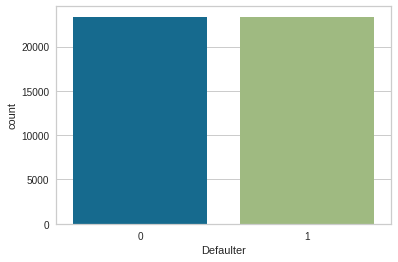

In [ ]:
sns.countplot('Defaulter', data = balance_data)

In [ ]:
balance_data[balance_data['Defaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
13,14,70000.000000,1,2,2,30,1,2,2,0,...,66782.000000,36137.000000,36894.000000,3200.000000,0.000000,3000.000000,3000.000000,1500.000000,0.000000,1
16,17,20000.000000,1,1,2,24,0,0,2,2,...,18338.000000,17905.000000,19104.000000,3200.000000,0.000000,1500.000000,0.000000,1650.000000,0.000000,1
21,22,120000.000000,2,2,1,39,-1,-1,-1,-1,...,0.000000,632.000000,316.000000,316.000000,316.000000,0.000000,632.000000,316.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,22277,138441.335116,1,2,2,25,1,0,0,0,...,121422.331502,117834.833655,120477.934567,4229.108893,6084.438601,5431.923397,3651.875248,8077.054719,776.215112,1
46724,2409,130000.000000,1,1,1,31,-1,0,0,-1,...,207.108855,188.036115,387.707777,603.496478,188.036115,207.523073,188.036115,387.707777,415.046145,1
46725,10472,200000.000000,2,1,1,39,1,-1,1,1,...,23.050887,28.813608,663.005757,1640.982961,0.000000,23.435068,57.627217,663.005757,89.130095,1
46726,23068,360000.000000,2,2,1,44,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [ ]:
ctr2 = setup(data=balance_data, 
             target='Defaulter',
             ignore_features=['ID'])

,Description,Value
0,Session id,3256
1,Target,Defaulter
2,Target type,Binary
3,Original data shape,"(46728, 24)"
4,Transformed data shape,"(46728, 24)"
5,Transformed train set shape,"(32709, 24)"
6,Transformed test set shape,"(14019, 24)"
7,Ignore features,1
8,Numeric features,23
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8355,0.9088,0.8213,0.8454,0.8331,0.6710,0.6713,4.3550
rf,Random Forest Classifier,0.8344,0.9087,0.8129,0.8495,0.8308,0.6688,0.6694,6.9850
lightgbm,Light Gradient Boosting Machine,0.8100,0.8922,0.7696,0.8374,0.8020,0.6200,0.6221,0.8390
gbc,Gradient Boosting Classifier,0.7874,0.8650,0.7541,0.8081,0.7800,0.5747,0.5761,10.7850
ada,Ada Boost Classifier,0.7592,0.8339,0.7402,0.7695,0.7545,0.5184,0.5188,2.4180
dt,Decision Tree Classifier,0.7401,0.7401,0.7515,0.7348,0.7430,0.4801,0.4803,0.5800
ridge,Ridge Classifier,0.7231,0.0000,0.7217,0.7238,0.7227,0.4462,0.4462,0.1090
lda,Linear Discriminant Analysis,0.7230,0.7905,0.7216,0.7238,0.7226,0.4461,0.4461,0.1980
knn,K Neighbors Classifier,0.7201,0.7911,0.8311,0.6802,0.7481,0.4402,0.4515,6.1210
lr,Logistic Regression,0.6237,0.6696,0.7374,0.6008,0.6621,0.2473,0.2540,1.8140


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3256, verbose=0, warm_start=False)

In [ ]:
etc = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8459,0.9181,0.8350,0.8538,0.8443,0.6918,0.6920
1,0.8315,0.8995,0.8270,0.8347,0.8308,0.6631,0.6631
2,0.8371,0.9106,0.8227,0.8471,0.8347,0.6741,0.6744
3,0.8444,0.9223,0.8276,0.8564,0.8418,0.6888,0.6892
4,0.8331,0.9050,0.8130,0.8471,0.8297,0.6662,0.6667
5,0.8273,0.9013,0.8061,0.8416,0.8235,0.6545,0.6551
6,0.8337,0.9027,0.8245,0.8399,0.8321,0.6674,0.6675
7,0.8340,0.9119,0.8141,0.8478,0.8306,0.6680,0.6685
8,0.8392,0.9104,0.8171,0.8548,0.8355,0.6784,0.6790


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_etc = tune_model(etc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7768,0.8517,0.7176,0.8141,0.7628,0.5537,0.5576
1,0.7511,0.8299,0.7054,0.7766,0.7393,0.5023,0.5044
2,0.7615,0.8432,0.7023,0.7968,0.7466,0.5231,0.5268
3,0.7790,0.8579,0.7323,0.8078,0.7682,0.5579,0.5604
4,0.7576,0.8325,0.6938,0.7954,0.7411,0.5152,0.5194
5,0.7741,0.8413,0.7150,0.8107,0.7598,0.5481,0.5520
6,0.7683,0.8423,0.7021,0.8090,0.7518,0.5365,0.5413
7,0.7735,0.8548,0.7187,0.8070,0.7603,0.5469,0.5502
8,0.7762,0.8465,0.7076,0.8200,0.7597,0.5524,0.5577


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


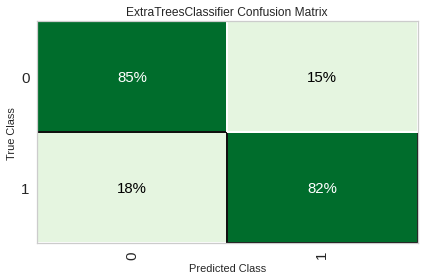

In [ ]:
plot_model(tuned_etc, plot='confusion_matrix', plot_kwargs={'percent':True})

In [ ]:
evaluate_model(tuned_etc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#Método 3

SEX
  * 1- Male; 2- Female


In [ ]:
print(data['SEX'].value_counts())

2    18112
1    11888
Name: SEX, dtype: int64


EDUCATION
  *  1 = graduate school; 2 = university; 3 = high school; 4 = others

In [ ]:
print(data['EDUCATION'].value_counts())

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


In [ ]:
fil = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[fil, 'EDUCATION'] = 4
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Marriage

  *  1 = married; 2 = single; 3 = others

In [ ]:
print(data['MARRIAGE'].value_counts())

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


In [ ]:
fil = data['MARRIAGE'] == 0
data.loc[fil, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
data_p = data
data_p.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [ ]:
data_p.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
data_p

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,MALE,high school,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,MALE,high school,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,MALE,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,MALE,high school,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
ctr3 = setup(data=data_p, 
             target='Defaulter',
             ignore_features = ['ID'],
             categorical_features=['SEX','EDUCATION','MARRIAGE']
            )

,Description,Value
0,Session id,1695
1,Target,Defaulter
2,Target type,Binary
3,Original data shape,"(30000, 24)"
4,Transformed data shape,"(30000, 29)"
5,Transformed train set shape,"(20999, 29)"
6,Transformed test set shape,"(9001, 29)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,20


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8202,0.7790,0.3608,0.6755,0.4701,0.3737,0.4005,7.6040
lightgbm,Light Gradient Boosting Machine,0.8182,0.7758,0.3630,0.6630,0.4688,0.3703,0.3949,0.9530
ada,Ada Boost Classifier,0.8160,0.7711,0.3190,0.6792,0.4340,0.3409,0.3757,2.1900
rf,Random Forest Classifier,0.8138,0.7595,0.3623,0.6395,0.4625,0.3601,0.3815,5.1490
lda,Linear Discriminant Analysis,0.8115,0.7157,0.2545,0.7051,0.3736,0.2905,0.3432,0.5590
et,Extra Trees Classifier,0.8073,0.7451,0.3591,0.6090,0.4516,0.3441,0.3619,3.8500
ridge,Ridge Classifier,0.7989,0.0000,0.1442,0.7323,0.2407,0.1811,0.2624,0.4340
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5550
lr,Logistic Regression,0.7787,0.6420,0.0000,0.0000,0.0000,-0.0002,-0.0016,2.9350
knn,K Neighbors Classifier,0.7523,0.6025,0.1724,0.3714,0.2351,0.1106,0.1223,3.6630


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1695, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8252,0.7742,0.3772,0.6917,0.4881,0.3936,0.4199
1,0.8219,0.7845,0.3879,0.6667,0.4905,0.3916,0.4126
2,0.8276,0.7829,0.3750,0.7073,0.4901,0.3980,0.4270
3,0.8114,0.7740,0.3556,0.6298,0.4545,0.3511,0.3720
4,0.8143,0.7790,0.3462,0.6518,0.4522,0.3528,0.3785
5,0.8271,0.7964,0.3613,0.7179,0.4807,0.3903,0.4235
6,0.8186,0.7746,0.3570,0.6694,0.4656,0.3683,0.3948
7,0.8262,0.7936,0.3742,0.7016,0.4881,0.3949,0.4232
8,0.8195,0.7540,0.3634,0.6706,0.4714,0.3740,0.3995


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

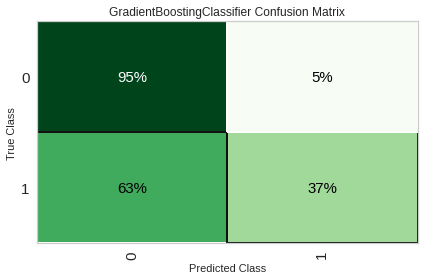

In [ ]:
plot_model(gbc, plot='confusion_matrix', plot_kwargs={'percent':True})

In [ ]:
fil = (balance_data['EDUCATION'] == 5) | (balance_data['EDUCATION'] == 6) | (balance_data['EDUCATION'] == 0)
balance_data.loc[fil, 'EDUCATION'] = 4
balance_data['EDUCATION'].value_counts()

2    22530
1    18052
3     5620
4      526
Name: EDUCATION, dtype: int64

In [ ]:
fil = balance_data['MARRIAGE'] == 0
balance_data.loc[fil, 'MARRIAGE'] = 3
balance_data['MARRIAGE'].value_counts()


1    25803
2    20529
3      396
Name: MARRIAGE, dtype: int64

In [ ]:
balance_data.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
ctr4 = setup(data=balance_data, 
             target='Defaulter',
             ignore_features = ['ID'],
             categorical_features=['SEX','EDUCATION','MARRIAGE']
            )

,Description,Value
0,Session id,1039
1,Target,Defaulter
2,Target type,Binary
3,Original data shape,"(46728, 24)"
4,Transformed data shape,"(46728, 29)"
5,Transformed train set shape,"(32709, 29)"
6,Transformed test set shape,"(14019, 29)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,20


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8303,0.9063,0.8113,0.8434,0.8270,0.6605,0.6611,7.9260
et,Extra Trees Classifier,0.8296,0.8991,0.8196,0.8363,0.8278,0.6591,0.6593,5.1950
lightgbm,Light Gradient Boosting Machine,0.8109,0.8920,0.7710,0.8379,0.8030,0.6218,0.6238,1.6430
gbc,Gradient Boosting Classifier,0.7857,0.8653,0.7493,0.8082,0.7776,0.5714,0.5730,12.2450
ada,Ada Boost Classifier,0.7614,0.8365,0.7433,0.7712,0.7570,0.5228,0.5232,3.0560
dt,Decision Tree Classifier,0.7422,0.7424,0.7549,0.7364,0.7455,0.4845,0.4847,1.1490
ridge,Ridge Classifier,0.7219,0.0000,0.7234,0.7213,0.7223,0.4438,0.4438,0.6370
lda,Linear Discriminant Analysis,0.7219,0.7923,0.7235,0.7213,0.7223,0.4438,0.4439,0.8270
knn,K Neighbors Classifier,0.7189,0.7914,0.8282,0.6797,0.7466,0.4378,0.4487,7.6790
lr,Logistic Regression,0.6225,0.6683,0.7400,0.5992,0.6622,0.2450,0.2521,4.1730


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1039, verbose=0, warm_start=False)

In [ ]:
rfc = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8389,0.9076,0.8190,0.8529,0.8356,0.6778,0.6783
1,0.8208,0.8985,0.8018,0.8334,0.8173,0.6417,0.6422
2,0.8242,0.9031,0.8061,0.8363,0.8209,0.6484,0.6488
3,0.8340,0.9123,0.8214,0.8425,0.8318,0.6680,0.6682
4,0.8358,0.9065,0.8226,0.8448,0.8336,0.6717,0.6719
5,0.8260,0.9012,0.7983,0.8453,0.8211,0.6521,0.6531
6,0.8423,0.9143,0.8111,0.8651,0.8372,0.6845,0.6858
7,0.8251,0.9077,0.8111,0.8346,0.8227,0.6503,0.6505
8,0.8288,0.9061,0.8264,0.8305,0.8284,0.6576,0.6576


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(rfc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

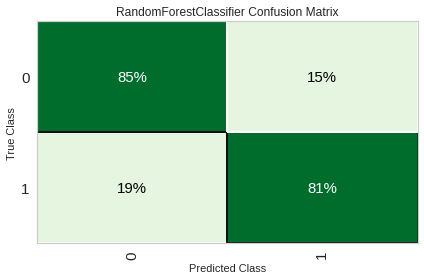

In [ ]:
plot_model(rfc, plot='confusion_matrix', plot_kwargs={'percent':True})

In [ ]:
data_predict = predict_model(rfc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8302,0.9056,0.8057,0.8473,0.8260,0.6605,0.6613


1    7010
0    7009
Name: Defaulter, dtype: int64
0    7353
1    6666
Name: prediction_label, dtype: int64


<Figure size 720x360 with 0 Axes>

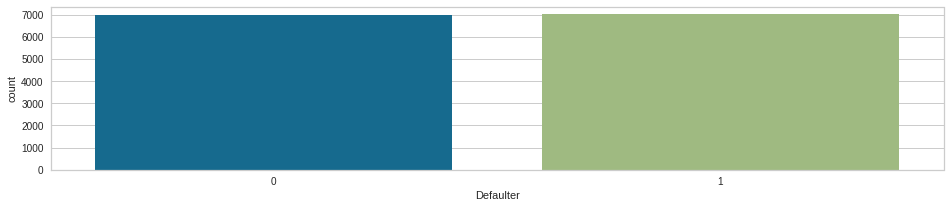

<Figure size 720x360 with 0 Axes>

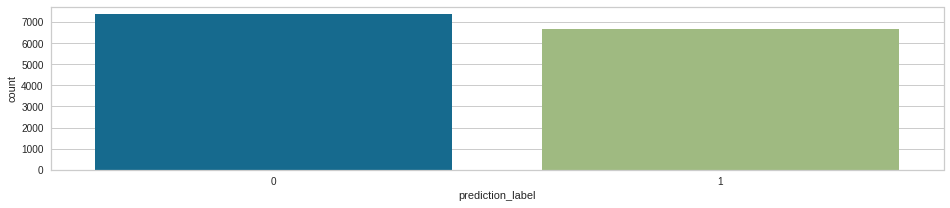

In [ ]:
cat_feature = ['Defaulter','prediction_label']
for col in cat_feature: 
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=1, figsize=(16,3))
  sns.countplot(data=data_predict,x=col)
print(data_predict['Defaulter'].value_counts())
print(data_predict['prediction_label'].value_counts())

In [ ]:
data_predict_2 = predict_model(rfc,data=data_p)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9386,0.9720,0.8772,0.8499,0.8633,0.8237,0.8239


0    23364
1     6636
Name: Defaulter, dtype: int64
0    23151
1     6849
Name: prediction_label, dtype: int64


<Figure size 720x360 with 0 Axes>

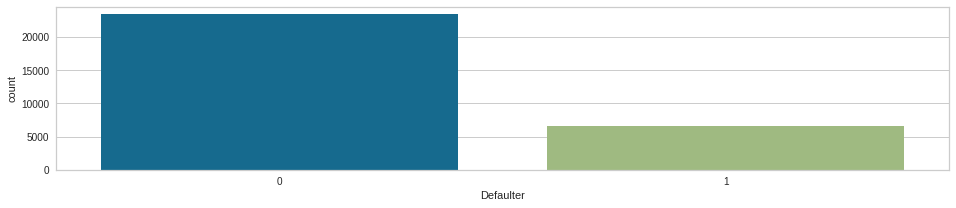

<Figure size 720x360 with 0 Axes>

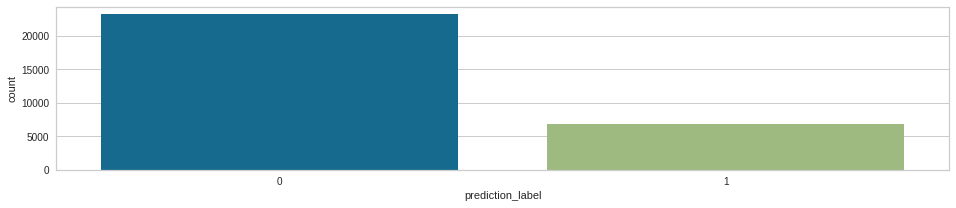

In [ ]:
cat_feature = ['Defaulter','prediction_label']
for col in cat_feature: 
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=1, figsize=(16,3))
  sns.countplot(data=data_predict_2,x=col)
print(data_predict_2['Defaulter'].value_counts())
print(data_predict_2['prediction_label'].value_counts())

In [ ]:
dashboard(rfc, display_format= 'inline')

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...


Algunas ideas para la exploración:
* ¿Cómo varía la probabilidad de incumplimiento de pago por categorías de diferentes variables demográficas?
* ¿Qué variables son los predictores más fuertes de incumplimiento de pago?

Acknowledgements
Any publications based on this dataset should acknowledge the following:
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
The original dataset can be found here at the UCI Machine Learning Repository.